In [4]:
import numpy as np
import xarray as xr
import os 
import cartopy.crs as ccrs
import matplotlib.pyplot as plt 
import matplotlib.colors as clr 

In [5]:
os.chdir('/home/ayhwong/fs03_storage/Custom_input/yiqi_ais_emis/')

In [6]:
### Let's look at one of the scenarios

emis_baseline = xr.open_dataset('baseline/monthly/regridded/annual_average.nc').mean(dim = 'time',skipna=True)
emis_baseline_low_NOx = xr.open_dataset('baseline_low_NOx/monthly/regridded/annual_average.nc').mean(dim = 'time',skipna=True)
emis_crack_scr = xr.open_dataset('CRACKSCR/monthly/regridded/annual_average.nc').mean(dim = 'time',skipna=True)
emis_crack_scramox_eca = xr.open_dataset('CRACKSCR_ECA_SCRAMOX/monthly/regridded/annual_average.nc').mean(dim = 'time',skipna=True)
emis_crack_scramox = xr.open_dataset('CRACKSCRAMOX/monthly/regridded/annual_average.nc').mean(dim = 'time',skipna=True)
emis_pure_eca_scr = xr.open_dataset('PURE_ECA_SCR/monthly/regridded/annual_average.nc').mean(dim = 'time',skipna=True)
emis_pure_eca_scramox = xr.open_dataset('PURE_ECA_SCRAMOX/monthly/regridded/annual_average.nc').mean(dim = 'time',skipna=True)
emis_pure_scramox = xr.open_dataset('PURESCRAMOX/monthly/regridded/annual_average.nc').mean(dim = 'time',skipna=True)

with xr.open_dataset('area_0.5x0.5.nc') as f:
    grid_area = f['cell_area']

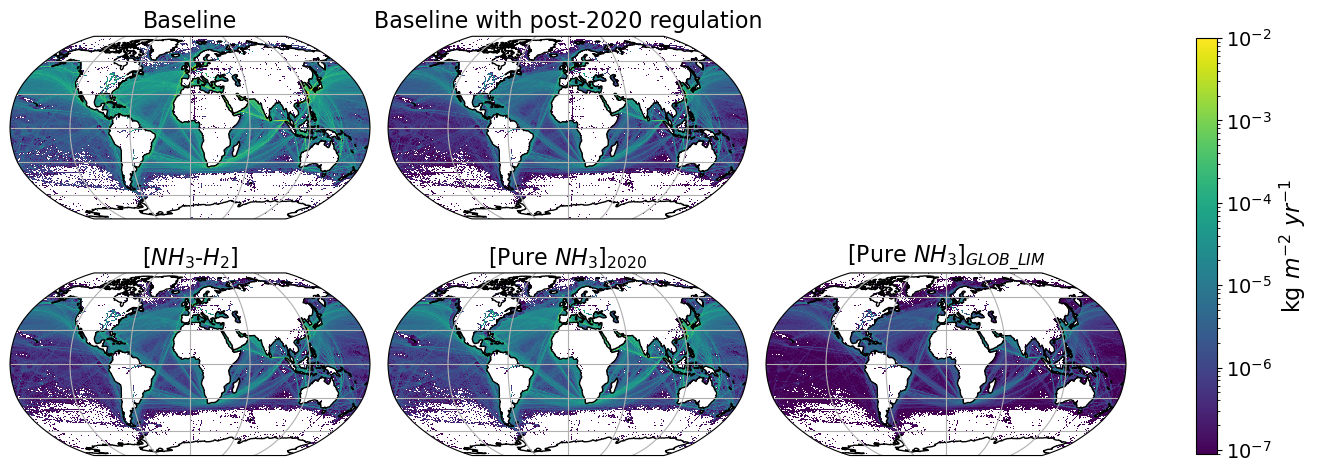

In [4]:
### Plot NOx emissions

norm_test = clr.LogNorm(vmin = 1e-2, vmax = 1e-7, clip = False)
fig, axes = plt.subplots(nrows = 2, ncols = 3,subplot_kw={'projection':ccrs.Robinson()},figsize = (18,6))
plt.subplots_adjust(hspace = 0.05,wspace = 0.05) 

emis_maps = [emis_baseline,emis_baseline_low_NOx,emis_crack_scr,emis_pure_eca_scr,emis_pure_scramox]
subtitle = ['Baseline','Baseline with post-2020 regulation','',r'[$NH_{3}$-$H_{2}$]',r'[Pure $NH_{3}$$]_{2020}$',r'[Pure $NH_{3}$$]_{GLOB\_LIM}$']
for i,ax in enumerate(axes.flat):
    if i == 2:
        ax.axis('off')
        continue
    if i <= 1:
        emis = emis_maps[i].NO2 * 365.25*24*60*60
    else:
        emis = emis_maps[i-1].NOx * 365.25*24*60*60
    ax.set_global()
    ax.coastlines()
    ax.gridlines()
    im = emis.plot(ax= ax,transform = ccrs.PlateCarree(),norm=norm_test,cmap = 'viridis',add_colorbar = False)
    ax.set_title(subtitle[i],fontsize = 16)

cbar = fig.colorbar(im,ax=axes.ravel().tolist(),shrink = 0.9)
cbar.ax.tick_params(labelsize=14)
cbar.set_label(r'kg $m^{-2}$ $yr^{-1}$',fontsize = 16)

#emis_maps = [emis_crack_scr,emis_crack_scramox_eca,emis_crack_scramox,emis_pure_eca_scr,emis_pure_eca_scramox,emis_pure_scramox]
    #emis = emis_maps[i].NOx * grid_area * 365.25*24*60*60
fig.set_rasterized(rasterized=True)

#plt.savefig('/home/ayhwong/fs03_storage/analysis_plot_script/NOx_emis.png',bbox_inches='tight',dpi = 300,facecolor ='white')
#plt.savefig('/home/ayhwong/fs03_storage/analysis_plot_script/NOx_emis.pdf',bbox_inches='tight',format = 'pdf',dpi = 300,facecolor ='white')
plt.savefig('/home/ayhwong/fs03_storage/analysis_plot_script/NOx_emis.eps',bbox_inches='tight',format = 'eps',dpi = 150,facecolor ='white')


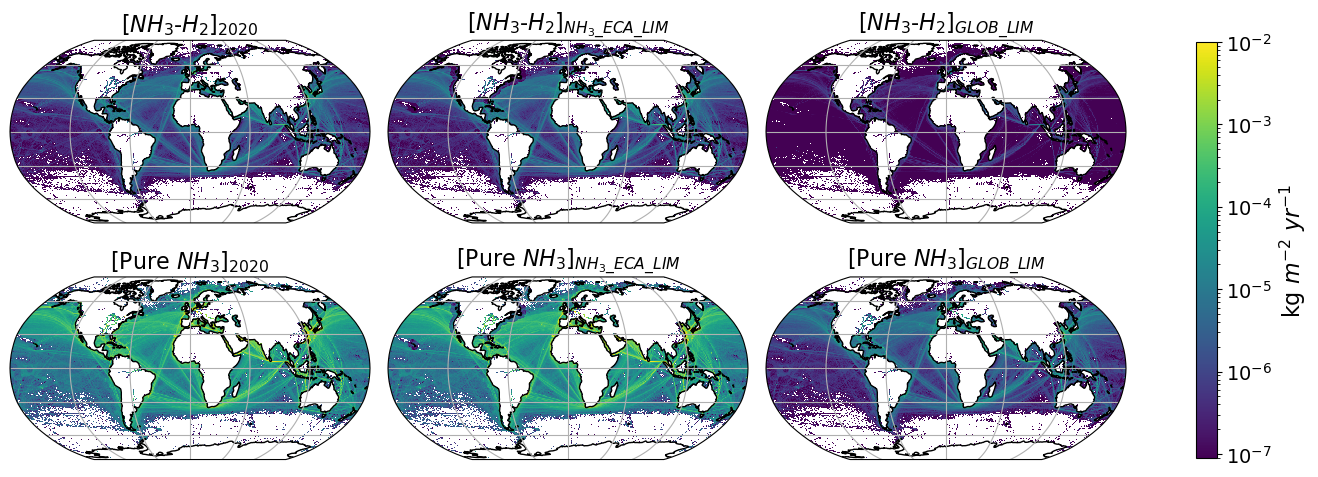

In [5]:
## Plot Ammonia emissions
norm = clr.LogNorm(vmin = 1e2, vmax = 1e7, clip = False)
fig, axes = plt.subplots(nrows = 2, ncols = 3,subplot_kw={'projection':ccrs.Robinson()},figsize = (18,6))

emis_maps = [emis_crack_scr,emis_crack_scramox_eca,emis_crack_scramox,emis_pure_eca_scr,emis_pure_eca_scramox,emis_pure_scramox]
subtitle = [r'[$NH_{3}$-$H_{2}$$]_{2020}$',r'[$NH_{3}$-$H_{2}$$]_{NH_3\_ECA\_LIM}$',r'[$NH_{3}$-$H_{2}$$]_{GLOB\_LIM}$',r'[Pure $NH_{3}$$]_{2020}$',r'[Pure $NH_{3}$$]_{NH_3\_ECA\_LIM}$',r'[Pure $NH_{3}$$]_{GLOB\_LIM}$']
plt.subplots_adjust(hspace = 0.05,wspace = 0.05) 

for i,ax in enumerate(axes.flat):
    emis = emis_maps[i].NH3 * 365.25*24*60*60
    ax.set_global()
    ax.coastlines()
    ax.gridlines()
    im = emis.plot(ax= ax,transform = ccrs.PlateCarree(),norm=norm_test,cmap = 'viridis',add_colorbar = False)
    ax.set_title(subtitle[i],fontsize = 16)

cbar = fig.colorbar(im,ax=axes.ravel().tolist(),shrink = 0.9)
cbar.ax.tick_params(labelsize=14)
cbar.set_label(r'kg $m^{-2}$ $yr^{-1}$',fontsize = 16)

#emis_maps = [emis_crack_scr,emis_crack_scramox_eca,emis_crack_scramox,emis_pure_eca_scr,emis_pure_eca_scramox,emis_pure_scramox]
    #emis = emis_maps[i].NOx * grid_area * 365.25*24*60*60

fig.set_rasterized(rasterized=True)

#plt.savefig('/home/ayhwong/fs03_storage/analysis_plot_script/NH3_emis.png',bbox_inches='tight',dpi = 300,facecolor ='white')
#plt.savefig('/home/ayhwong/fs03_storage/analysis_plot_script/NH3_emis.pdf',bbox_inches='tight',format = 'pdf',dpi = 300,facecolor ='white')
plt.savefig('/home/ayhwong/fs03_storage/analysis_plot_script/NH3_emis.eps',bbox_inches='tight',format = 'eps',dpi = 150,facecolor ='white')


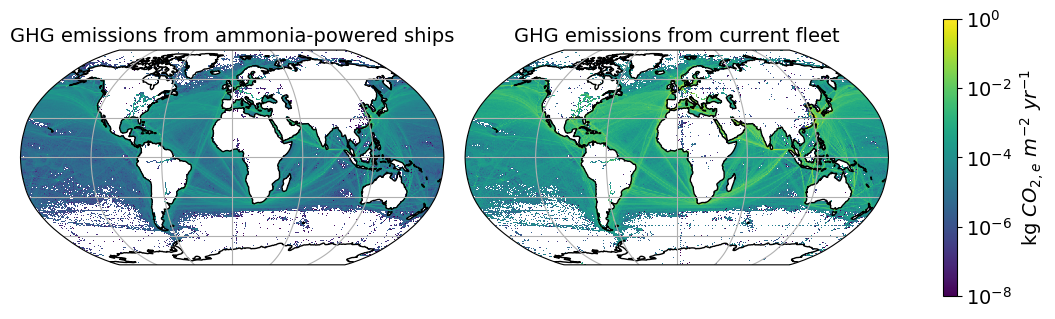

In [36]:
## Plot N2O emissions
norm = clr.LogNorm(vmin = 1e-8, vmax = 1, clip = False)
fig, ax = plt.subplots(nrows=1, ncols=2, subplot_kw={'projection':ccrs.Robinson()},figsize = (14,6))
plt.subplots_adjust(hspace = 0.05,wspace = 0.05) 


emis = emis_crack_scr.N2O * 365.25*24*60*60*273
ax[0].set_global()
ax[0].coastlines()
ax[0].gridlines()
im = emis.plot(ax= ax[0],transform = ccrs.PlateCarree(),norm=norm,cmap = 'viridis',add_colorbar = False)
ax[0].set_title('GHG emissions from ammonia-powered ships',fontsize = 14)

emis = emis_baseline.CO2 * 365.25*24*60*60
ax[1].set_global()
ax[1].coastlines()
ax[1].gridlines()
im = emis.plot(ax= ax[1],transform = ccrs.PlateCarree(),norm=norm,cmap = 'viridis',add_colorbar = False)
ax[1].set_title('GHG emissions from current fleet',fontsize = 14)


cbar = fig.colorbar(im,ax=ax.ravel().tolist(),shrink = 0.6)
cbar.ax.tick_params(labelsize=14)
cbar.set_label(r'kg $CO_{2,e}$ $m^{-2}$ $yr^{-1}$',fontsize = 14)

#emis_maps = [emis_crack_scr,emis_crack_scramox_eca,emis_crack_scramox,emis_pure_eca_scr,emis_pure_eca_scramox,emis_pure_scramox]
    #emis = emis_maps[i].NOx * grid_area * 365.25*24*60*60

#fig.set_rasterized(rasterized=True)

#plt.savefig('/home/ayhwong/fs03_storage/analysis_plot_script/NH3_emis.png',bbox_inches='tight',dpi = 300,facecolor ='white')
#plt.savefig('/home/ayhwong/fs03_storage/analysis_plot_script/NH3_emis.pdf',bbox_inches='tight',format = 'pdf',dpi = 300,facecolor ='white')
plt.savefig('/home/ayhwong/fs03_storage/analysis_plot_script/N2O_emis.eps',bbox_inches='tight',format = 'eps',dpi = 150,facecolor ='white')
